In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
#Importamos la libreria

In [8]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()
#vemos en pantalla los 5 primeros registros del archivo csv

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [9]:
dataframe.describe()
#información estadística básica de nuestro set de datos

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [10]:
print(dataframe.groupby('clase').size())
#analizaremos cuantos resultados tenemos de cada tipo usando la función groupby y vemos que tenemos 86 usuarios «Clase 0», es decir Windows, 40 usuarios Mac y 44 de Linux.

clase
0    86
1    40
2    44
dtype: int64


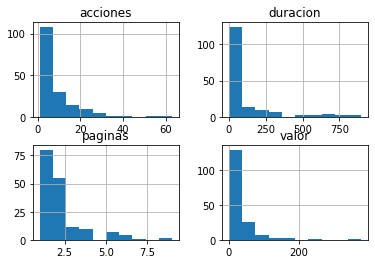

In [11]:
dataframe.drop(['clase'],1).hist()
plt.show()
#visualizamos en formato de historial los cuatro Features de entrada con nombres «duración», «páginas»,»acciones» y «valor»

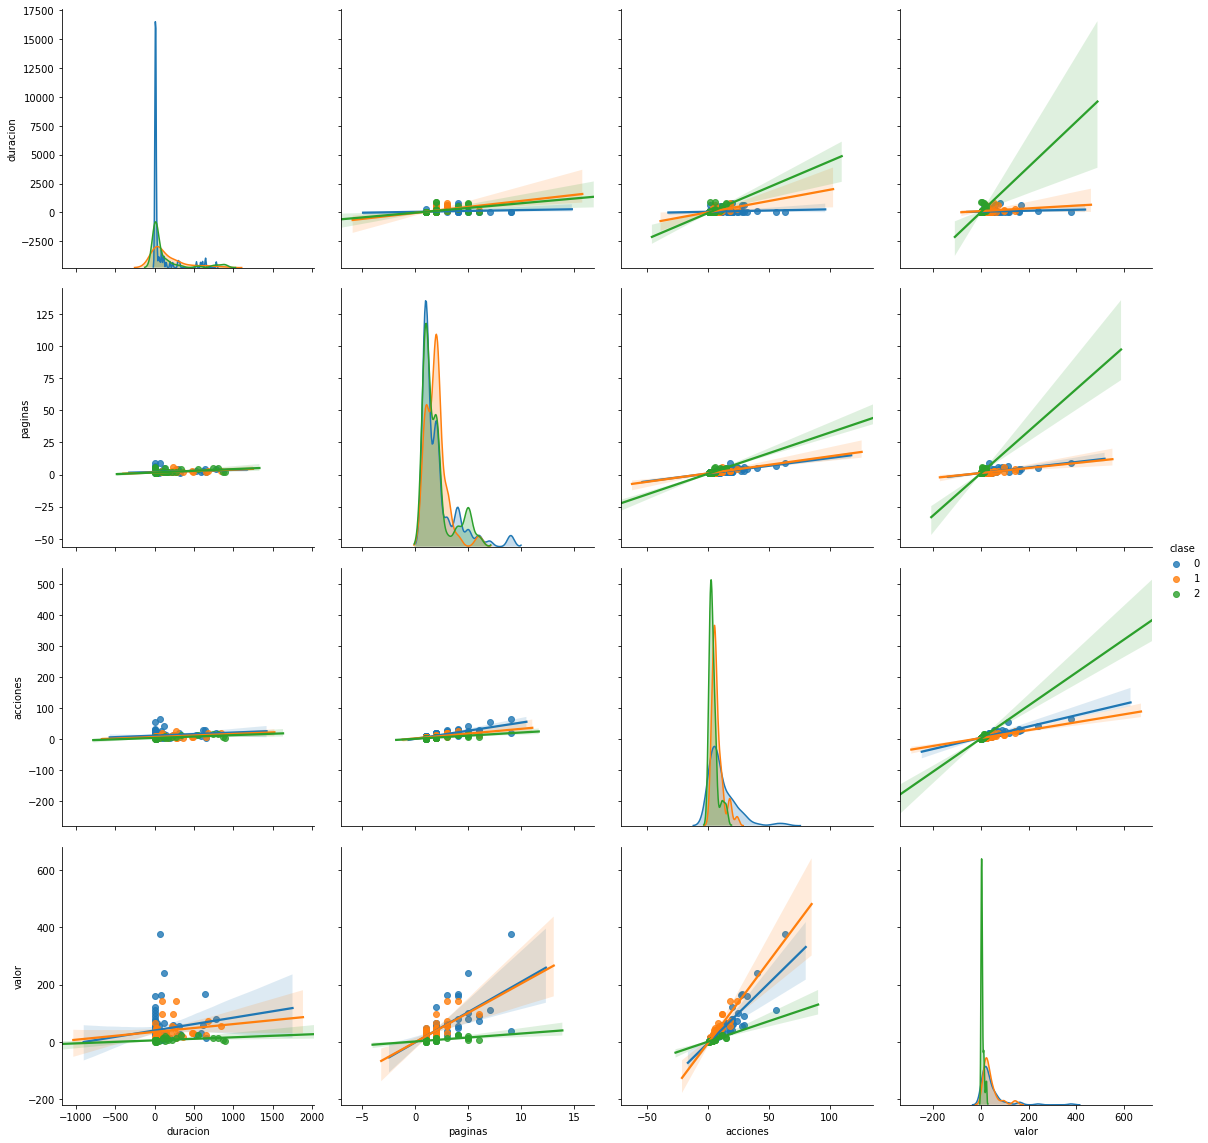

In [13]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')
# interrelacionamos las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.

In [14]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape
#cargamos las variables de las 4 columnas de entrada en X excluyendo la columna «clase» con el método drop(). En cambio agregamos la columna «clase» en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas.

(170, 4)

In [17]:
predictions = model.predict(X)
print(predictions[0:5])
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método «predict(X)» y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

[2 2 2 2 2]


In [18]:
model.score(X,y)
#precisión media de las predicciones, en nuestro caso del 77%.

0.7764705882352941

In [19]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
#Validacion de nuestro modelo

In [21]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
#Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 74%.

Logistic Regression: 0.743407 (0.115752)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [22]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
#hacemos las predicciones -en realidad clasificación- utilizando nuestro «cross validation set», es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 85% pero hay que tener en cuenta que el tamaño de datos era pequeño.


0.8529411764705882


In [23]:
print(confusion_matrix(Y_validation, predictions))
#Resultados del modelo. (total de 34 registros)

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [24]:
print(classification_report(Y_validation, predictions))
#Podemos ver la precisión con que se acertaron cada una de las clases y vemos que por ejemplo de Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). La valoración que de aqui nos conviene tener en cuenta es la de F1-score, que tiene en cuenta la precisión y recall. El promedio de F1 es de 84% lo cual no está nada mal.


              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [30]:
#Clasificación (o predicción) de nuevos valores

#datos de entrada de navegación de un usuario ficticio que tiene valores de:

#-Tiempo Duración: 10
#-Paginas visitadas: 3
#-Acciones al navegar: 5
#-Valoración: 9

#Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [26]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2], dtype=int64)